![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [61]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE

In [62]:
penguins_df.info()
penguins_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        332.000000       332.000000         332.000000   332.000000
mean          44.021084        17.153012         200.975904  4206.475904
std            5.452462         1.960275          14.035971   806.361278
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.700000        17.300000         197.000000  4025.000000
75%           48.625000        18.700000         213.000000  4781.250000
max           59.600000        21.500000         231.000000  6300.000000

<AxesSubplot: title={'center': 'body_mass_g'}, xlabel='sex'>

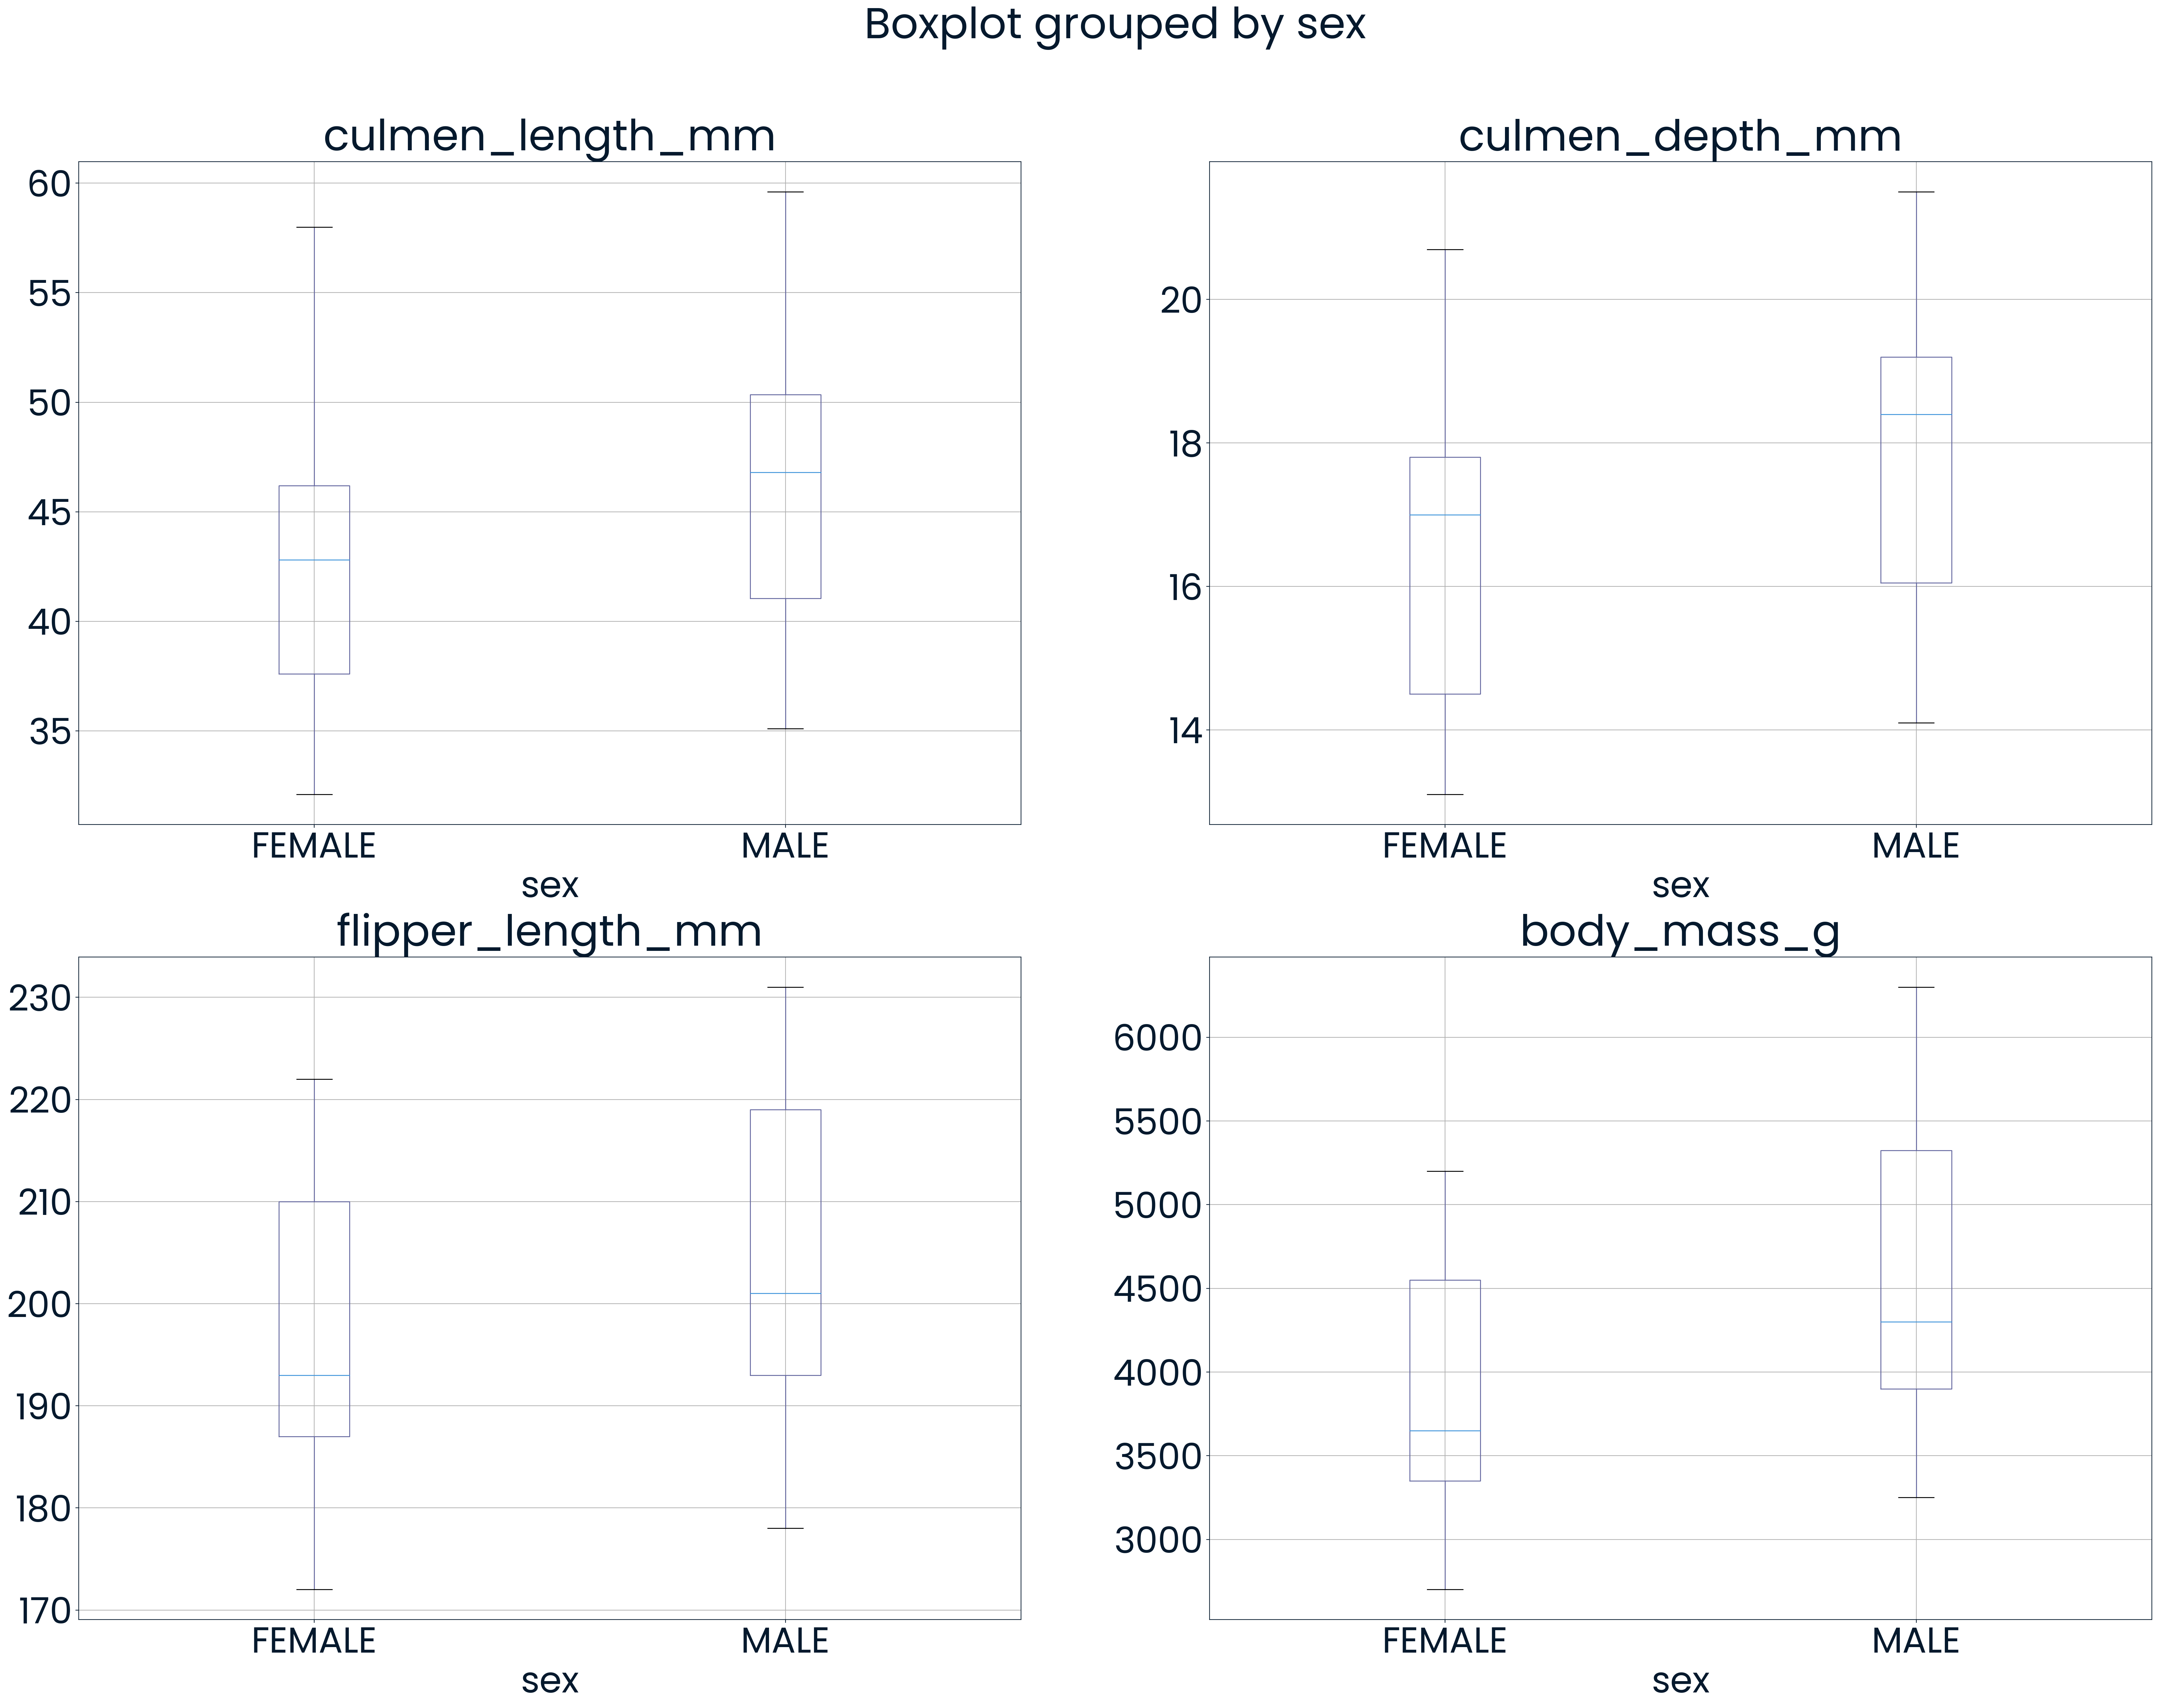

In [63]:
# Distribution boxplots
fig_box, axs_box = plt.subplots(2,2,figsize=(40,30))
penguins_df.boxplot(column = 'culmen_length_mm', by='sex', ax=axs_box[0,0])
penguins_df.boxplot(column = 'culmen_depth_mm', by='sex', ax=axs_box[0,1])
penguins_df.boxplot(column = 'flipper_length_mm', by='sex', ax=axs_box[1,0])
penguins_df.boxplot(column = 'body_mass_g', by='sex', ax=axs_box[1,1])

We see that, all the indices for male penguines are generally higher than those for female penguines. 

<AxesSubplot: xlabel='flipper_length_mm', ylabel='body_mass_g'>

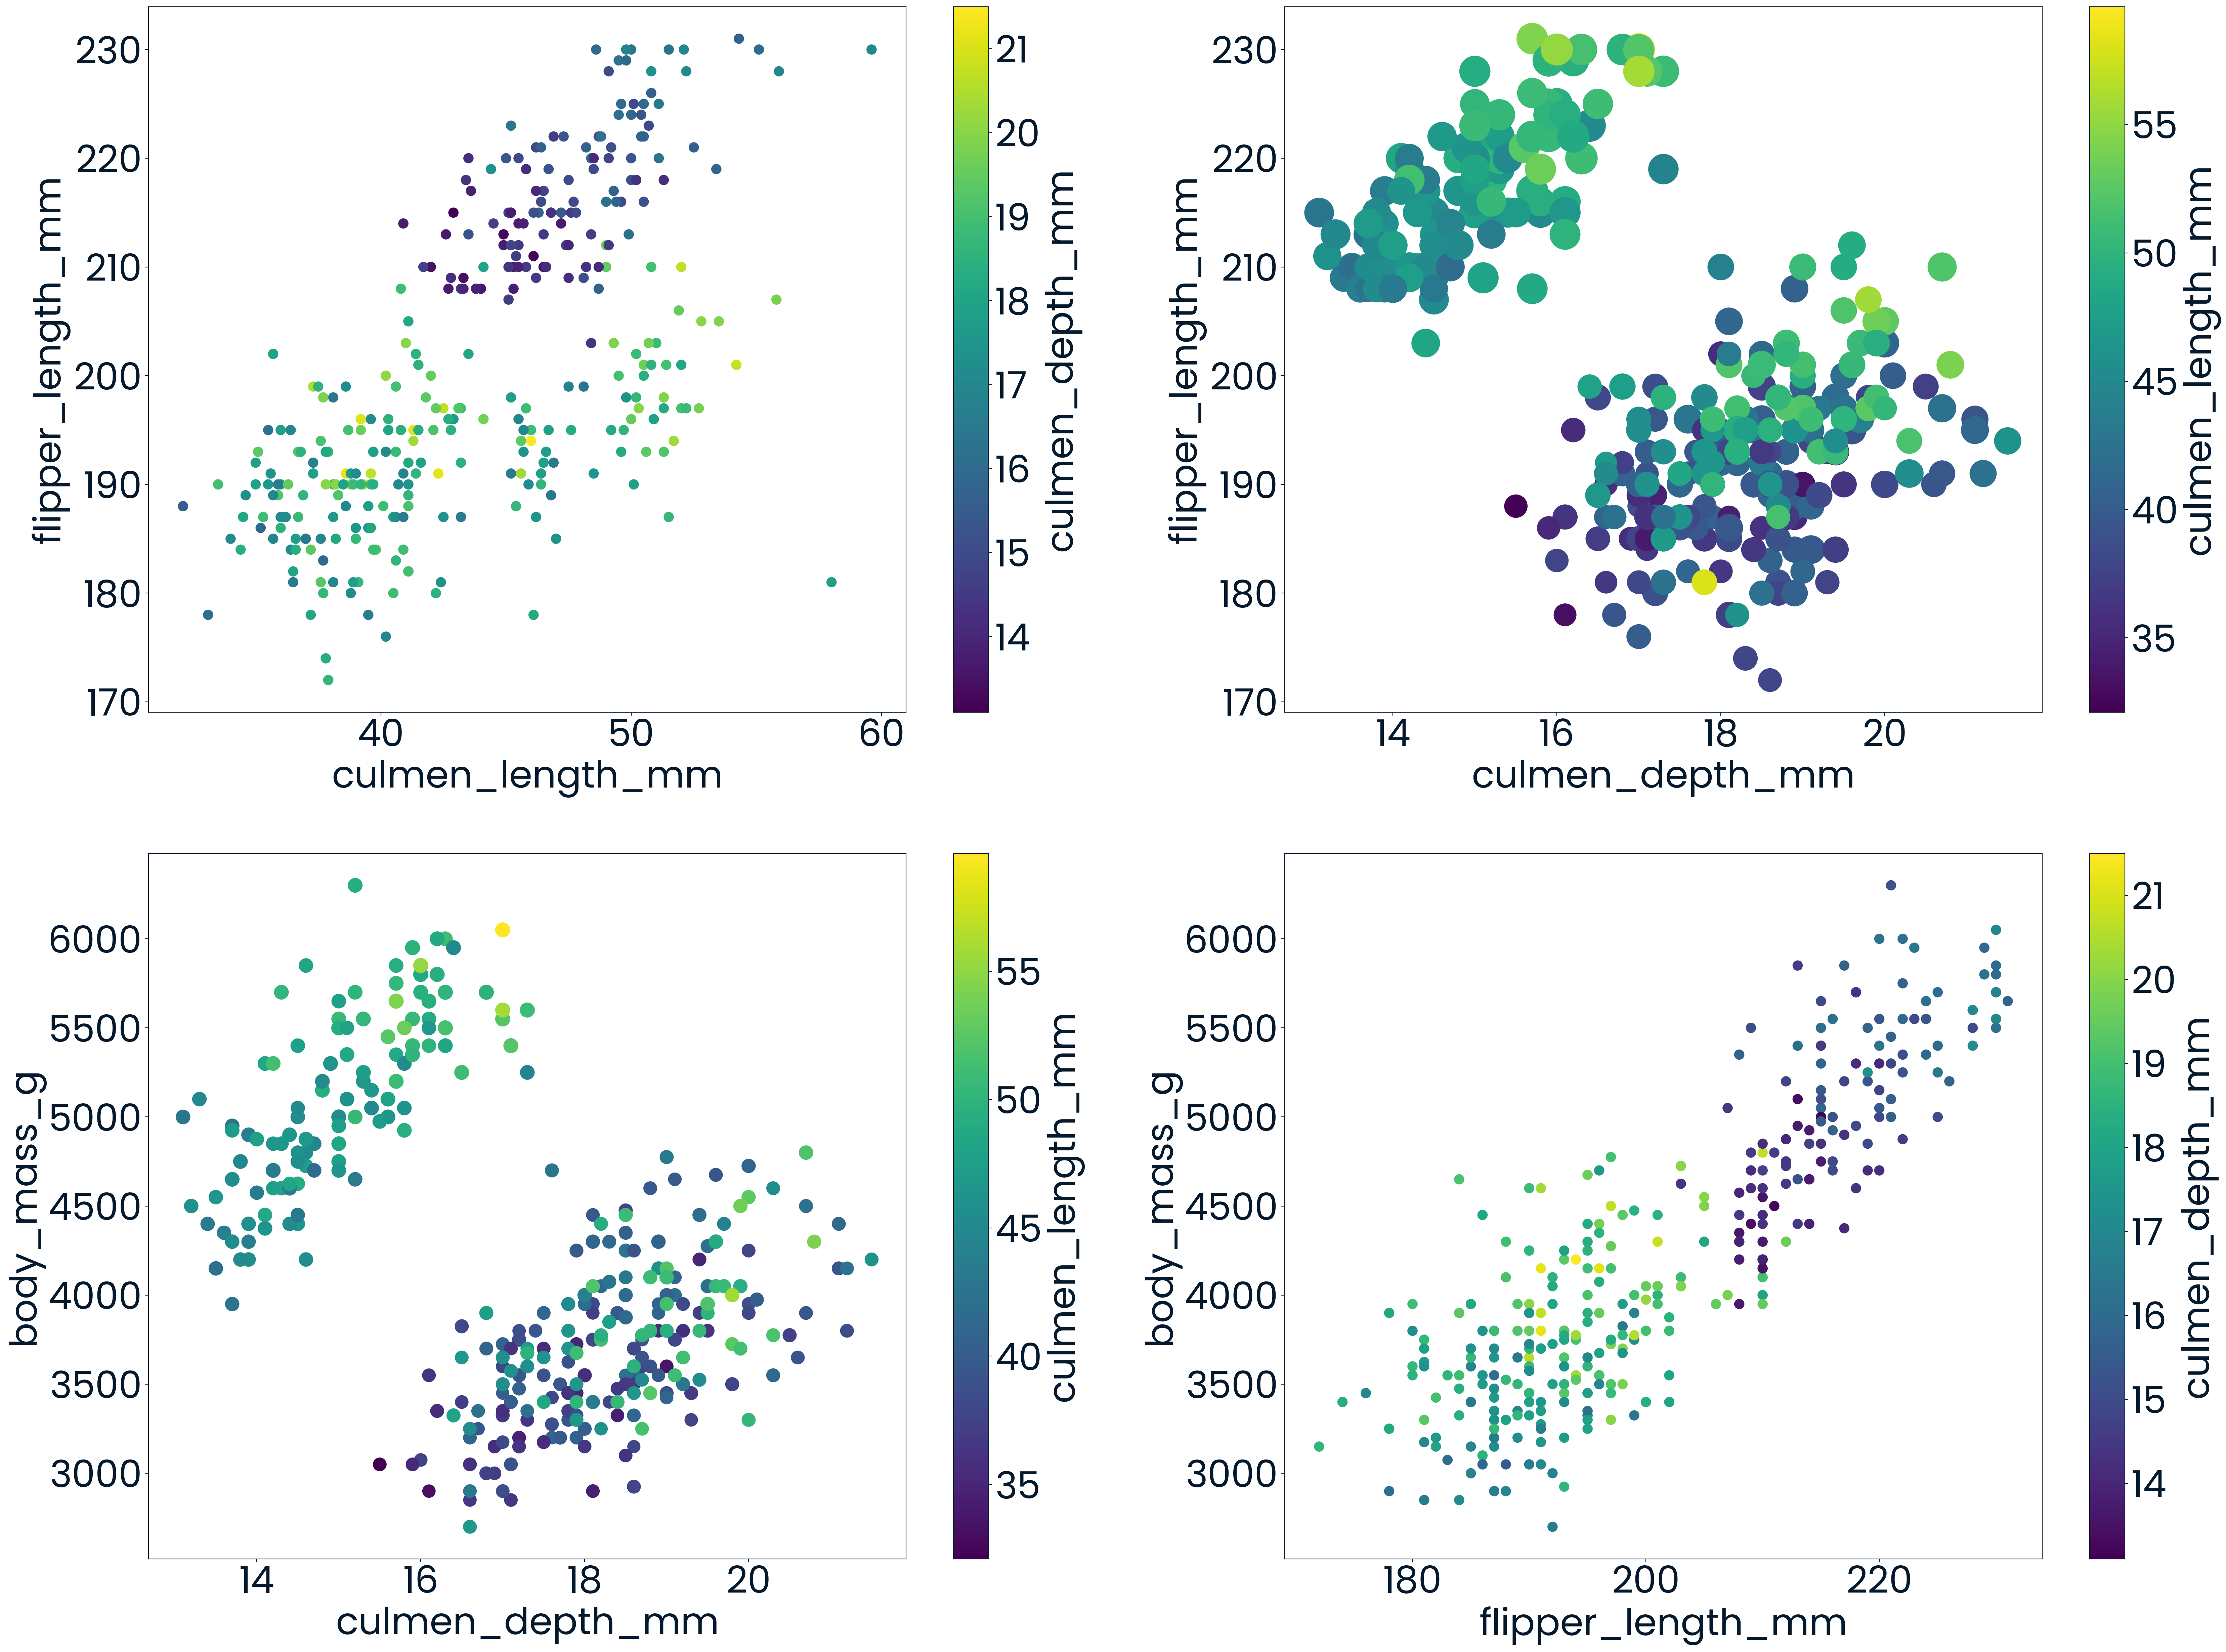

In [64]:
fig, axs = plt.subplots(2,2,figsize=(40,30))
plt.rcParams['font.size'] = 40
#penguins_df.plot.scatter(x='culmen_length_mm', y='culmen_depth_mm', 
#                         ax=axs[0,0], color='red')
penguins_df.plot.scatter(x='culmen_length_mm', y='flipper_length_mm', 
                         ax=axs[0,0], color='culmen_depth_mm', s = 100)
#penguins_df.plot.scatter(x='culmen_length_mm', y='body_mass_g', ax=axs[1,0])
penguins_df.plot.scatter(x='culmen_depth_mm', y='flipper_length_mm', 
                         ax=axs[0,1], c = 'culmen_length_mm', s=0.19*penguins_df['body_mass_g'])
penguins_df.plot.scatter(x='culmen_depth_mm', y='body_mass_g', 
                         ax=axs[1,0], c = 'culmen_length_mm', s='flipper_length_mm')
penguins_df.plot.scatter(x='flipper_length_mm', y='body_mass_g', 
                         ax=axs[1,1], c = 'culmen_depth_mm', s=100)


In [65]:
penguins_df['sex'] = penguins_df['sex'] == 'MALE'

In [66]:
# scaling
scaler = StandardScaler()
penguins_df_scaled = scaler.fit_transform(penguins_df)

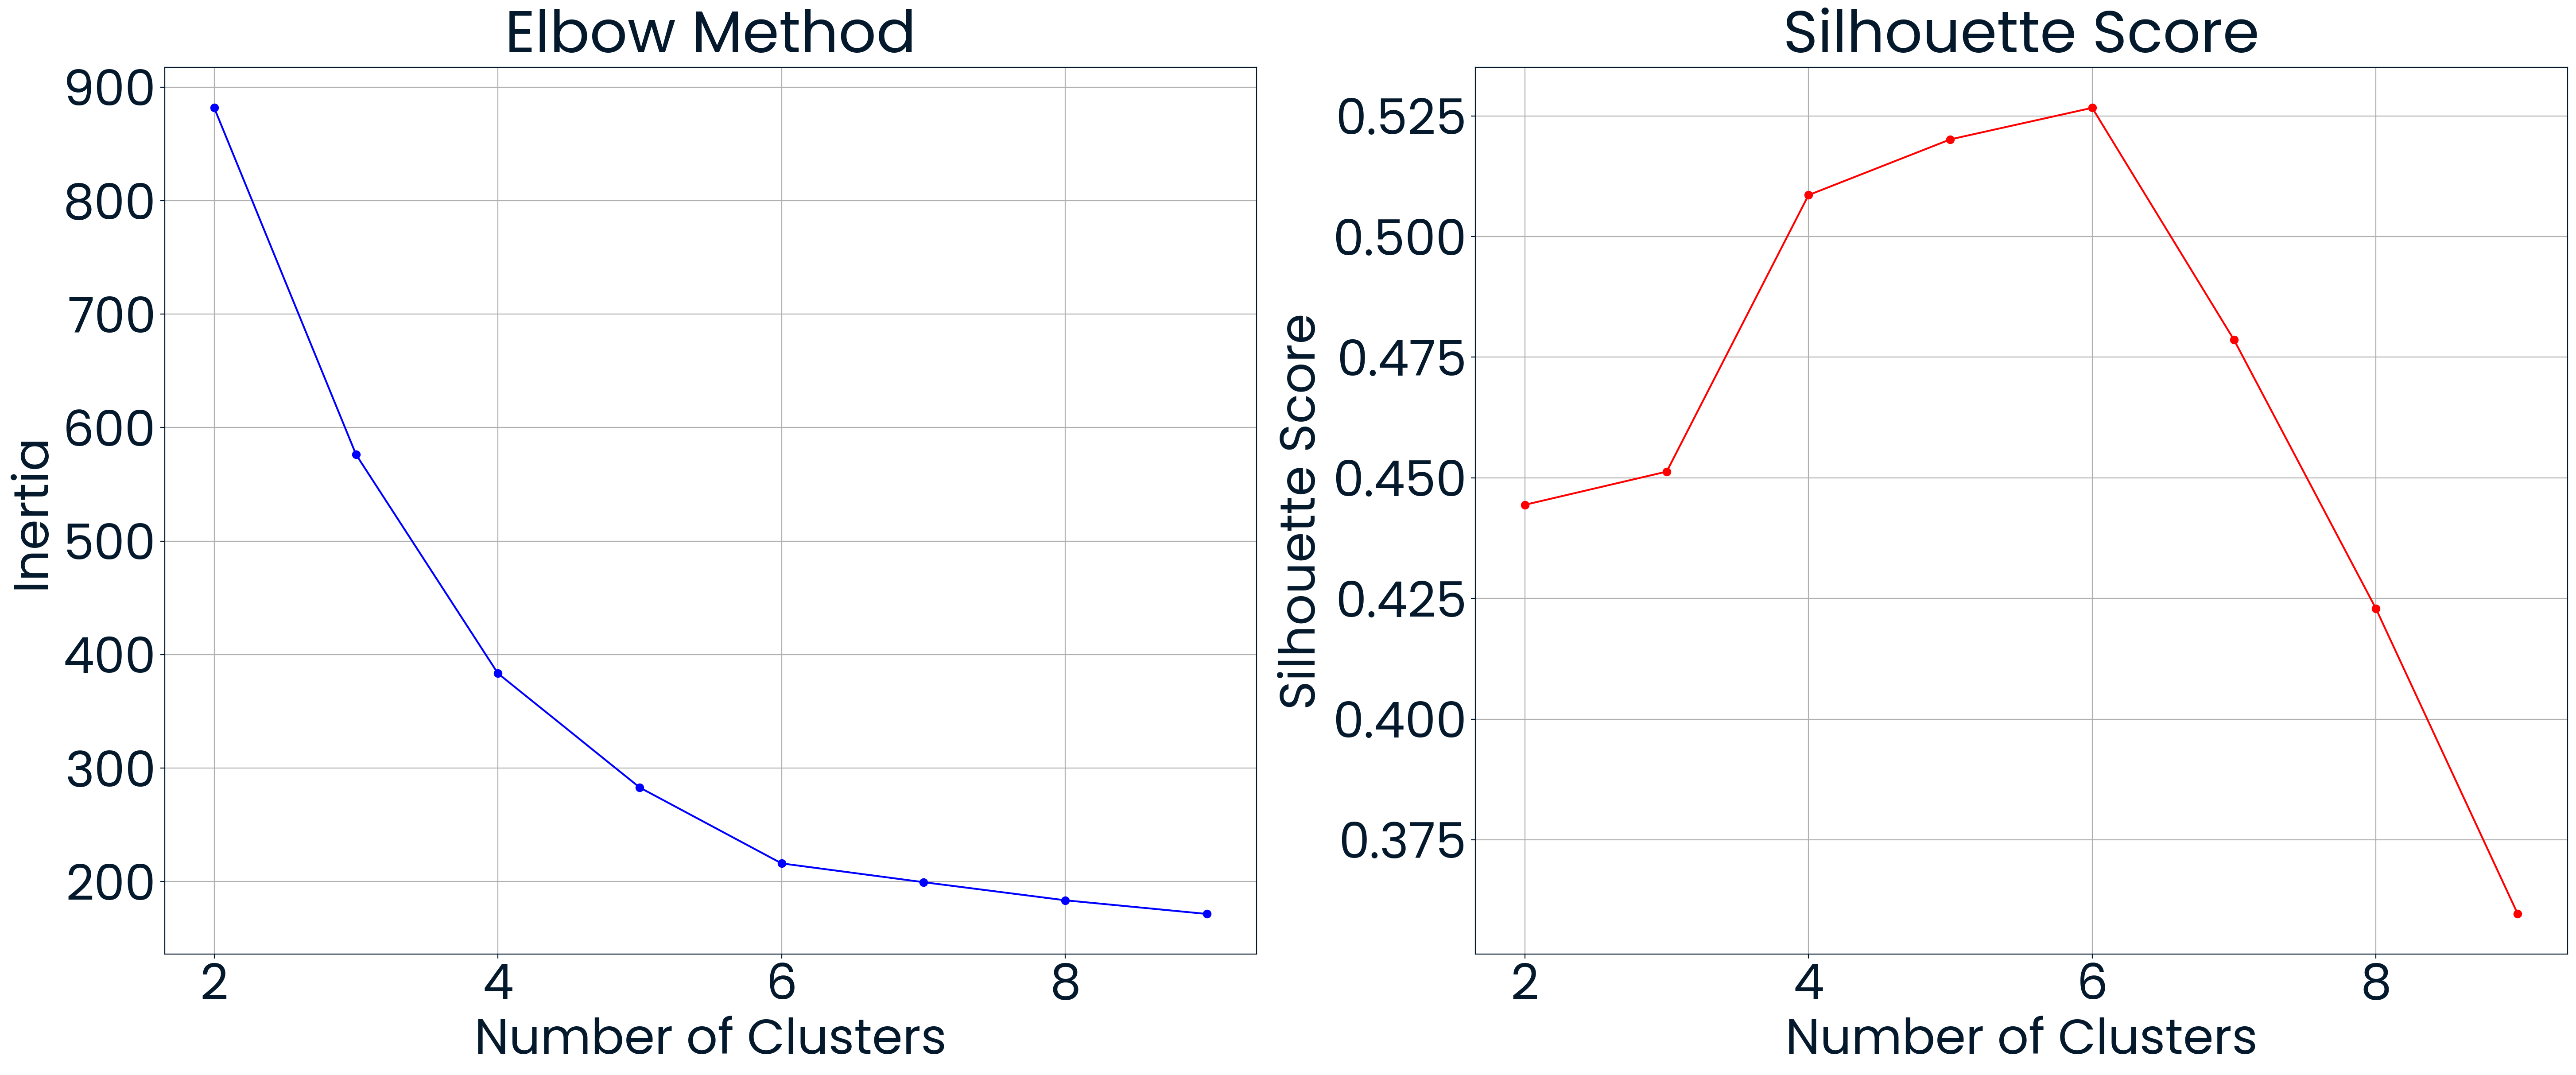

In [67]:
# KMean
from sklearn.metrics import silhouette_score 

list_K = list(range(2,10))
# Calculate internia and Silhouette scores for different number of clusters
inertia = []
Sscore = []
for k in list_K:
    kmeans = KMeans(
        n_clusters=k,       # Number of clusters
        init='k-means++',   # Initialization method
        n_init=10,          # Number of time the k-means algorithm will run with different centroid seeds
        max_iter=300,       # Maximum iterations per run
        random_state=42     # For reproducibility
    )
    
    kmeans.fit(penguins_df_scaled)
    labels = kmeans.predict(penguins_df_scaled)
    score = silhouette_score(penguins_df_scaled, labels)
    inertia.append(kmeans.inertia_)
    Sscore.append(score)
    
#rate = [inertia[i]/inertia[i+1] for i in range(len(list_K)-1)]
# plot them
fig_score, ax_score = plt.subplots(1,2,figsize=(35, 13))
ax_score[0].plot(list_K, inertia, 'b-o')
ax_score[0].set_title("Elbow Method")
ax_score[0].set_xlabel("Number of Clusters")
ax_score[0].set_ylabel("Inertia")
ax_score[0].grid(True)

ax_score[1].plot(list_K, Sscore, 'r-o')
ax_score[1].set_title("Silhouette Score")
ax_score[1].set_xlabel("Number of Clusters")
ax_score[1].set_ylabel("Silhouette Score")
ax_score[1].grid(True)

plt.show()
    

From the Elbow plot, one can observe that:
- The rates of decrease from n=2 to n=3 and from n=3 to n=4 are similar.
- From n=4 to n=5, the rate of decrease changes significantly.
=> n=4 should be the optimal number of clusters.

Optional: From the Sihouette plot, one can see that the scores of n=2 and n=3 changes very little. There are also little changes from n=4 to n=5, and from n=5 to n=6. But there is a much more significant change from n=3 to n=4.

From these arguments, and from the scatter plots, I conclude that the optimal number of clusters is 4.

In [68]:
# fit Kmeans again to the data with the optimal number of clusters
n_clusters = 4
kmeans = KMeans(
            n_clusters=n_clusters,       # Number of clusters
            init='k-means++',   # Initialization method
            n_init=10,          # Number of time the k-means algorithm will run with different centroid seeds
            max_iter=300,       # Maximum iterations per run
            random_state=42     # For reproducibility
        )

results = kmeans.fit(penguins_df_scaled)
# add new columns 'cluster'
penguins_df['cluster'] = kmeans.labels_

<AxesSubplot: xlabel='flipper_length_mm', ylabel='body_mass_g'>

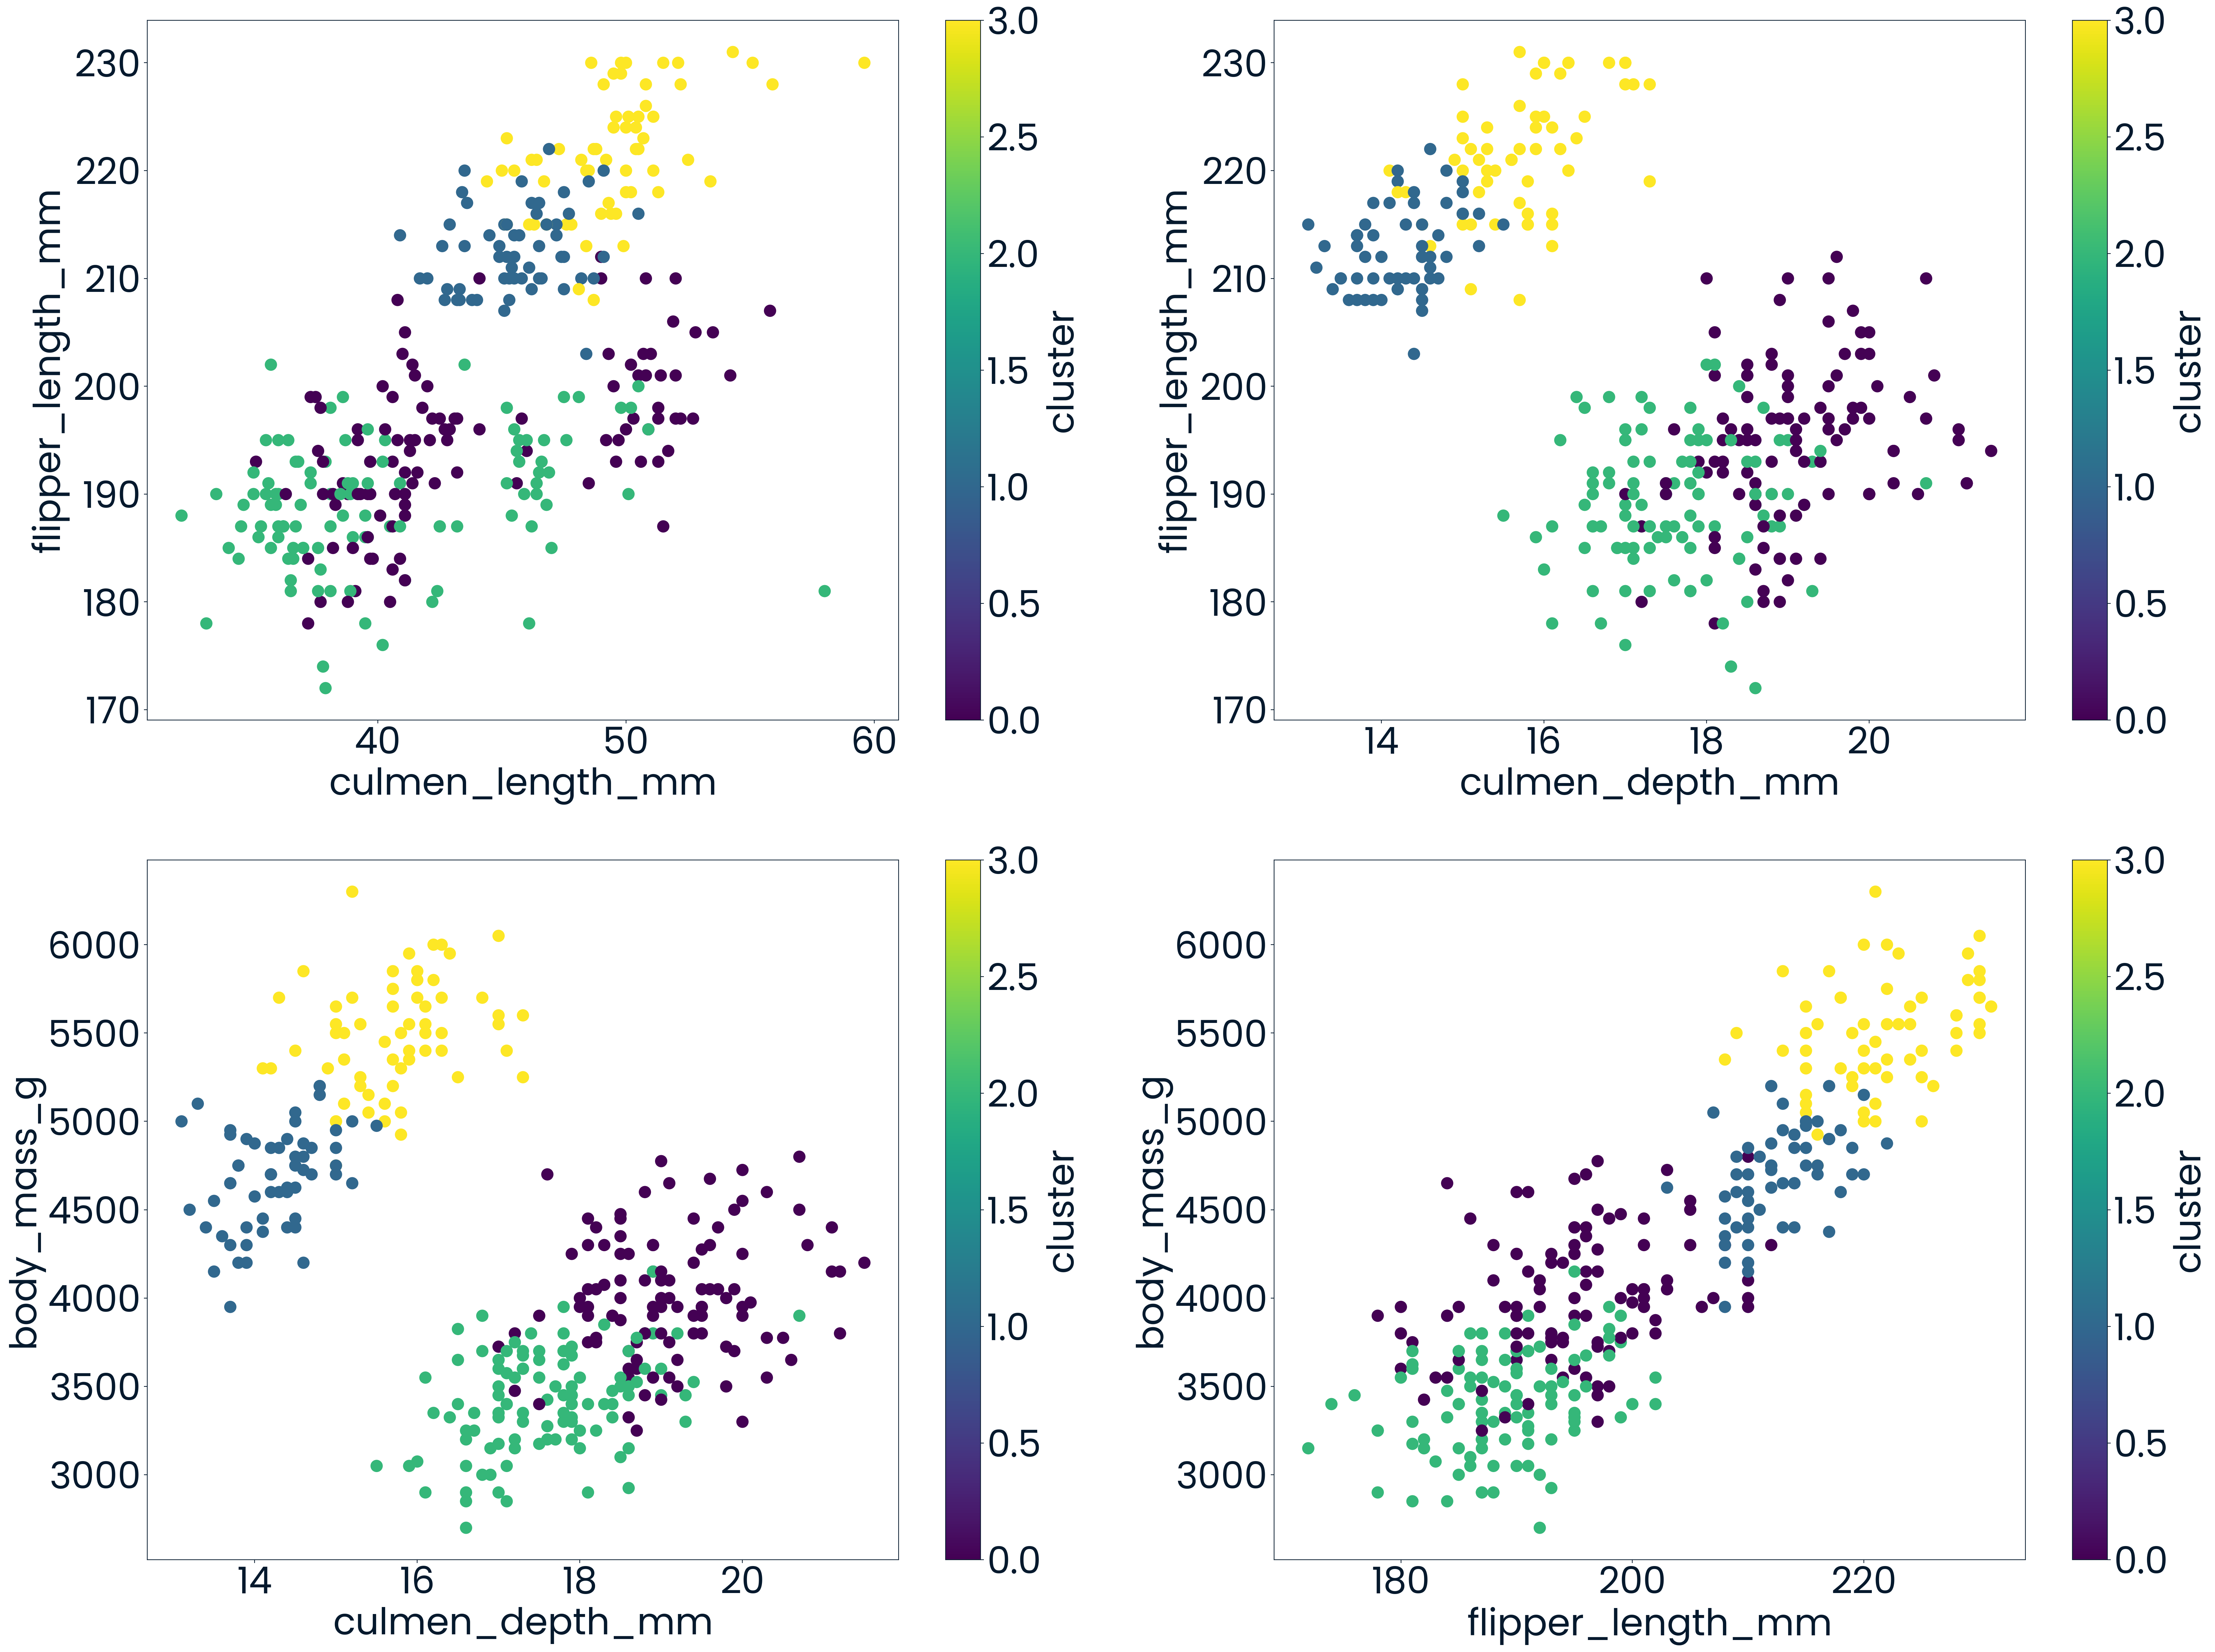

In [69]:
penguins_df.head()
fig_cl, axs_cl = plt.subplots(2,2,figsize=(40,30))
plt.rcParams['font.size'] = 40

penguins_df.plot.scatter(x='culmen_length_mm', y='flipper_length_mm', 
                         ax=axs_cl[0,0], color='cluster', s=150, colormap='viridis')
penguins_df.plot.scatter(x='culmen_depth_mm', y='flipper_length_mm', 
                         ax=axs_cl[0,1], c = 'cluster', s=150, colormap='viridis')
penguins_df.plot.scatter(x='culmen_depth_mm', y='body_mass_g', 
                         ax=axs_cl[1,0], c = 'cluster', s=150, colormap='viridis')
penguins_df.plot.scatter(x='flipper_length_mm', y='body_mass_g', 
                         ax=axs_cl[1,1], c = 'cluster', s=150, colormap='viridis')

In [70]:
stat_penguins = penguins_df.groupby('cluster').agg(avg_culmen_length_mm = ('culmen_length_mm','mean'),
                                                   avg_culmen_depth_mm = ('culmen_depth_mm','mean'),
                                                   avg_flipper_length_mm = ('flipper_length_mm','mean'),
                                                   avg_body_mass_g = ('body_mass_g','mean'))
stat_penguins

avg_culmen_length_mm  ...  avg_body_mass_g
cluster                        ...                 
0                   43.878302  ...      4006.603774
1                   45.563793  ...      4679.741379
2                   40.217757  ...      3419.158879
3                   49.473770  ...      5484.836066

[4 rows x 4 columns]